In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

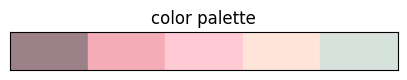

In [2]:
c_pal = ['#9d8189', '#f4acb7', '#ffcad4', '#ffe5d9', '#d8e2dc']

fig, ax = plt.subplots(figsize=(5, 0.5))

for i, color in enumerate(c_pal):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

ax.set_xlim(0, len(c_pal))
ax.set_ylim(0, 1)

ax.set_xticks([])
ax.set_yticks([])

plt.title('color palette')

plt.show();

In [3]:
data = pd.read_csv('data/plaenterwaldlauf.csv')

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

In [5]:
data.head()

,Startnr.,AK,Platz AK,Verein,Bruttozeit,Nettozeit,Strecke
0,605,M 20,1,TuS Kreuzweingarten-Rheder,17:16 min,(17:15),5
1,666,M 40,1,LG Mauerweg Berlin e.V.,17:56 min,(17:55),5
2,1083,M 30,1,BSV Friesen,18:07 min,(18:05),5
3,643,M 20,2,TuS Neukölln Berlin,18:12 min,(17:55),5
4,601,M 35,1,TVB 09,18:43 min,(18:27),5


Let's change the column names to English!

In [6]:
data = data.rename(columns=dict(zip(data.columns, ['Bib_number', 'Age_group', 'Ranking_age_group', 'Club', 'Gross_time', 'Net_time', 'Distance'])))

And now let's try to get an overview of the data.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Bib_number         687 non-null    int64 
 1   Age_group          687 non-null    object
 2   Ranking_age_group  687 non-null    int64 
 3   Club               674 non-null    object
 4   Gross_time         687 non-null    object
 5   Net_time           687 non-null    object
 6   Distance           687 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 37.7+ KB


In [8]:
data.shape

(687, 7)

In [9]:
missing = pd.DataFrame(data.isnull().sum(), columns=["Amount"])
missing['Percentage'] = round((missing['Amount']/data.shape[0])*100, 2)
missing

,Amount,Percentage
Bib_number,0,0.00
Age_group,0,0.00
Ranking_age_group,0,0.00
Club,13,1.89
Gross_time,0,0.00
Net_time,0,0.00
Distance,0,0.00


There are a couple of values missing in the Club column.

In [10]:
data.nunique()

Bib_number           687
Age_group             37
Ranking_age_group     32
Club                 203
Gross_time           632
Net_time             625
Distance               4
dtype: int64

Since I'm the one who created this data set by the sweat of my brow, I already know what small changes I want to make before I start the analysis.

I would like to split the Age_goup column in order to have separate columns for age group and gender.

In [11]:
data['Age_group'].unique()

array(['M 20', 'M 40', 'M 30', 'M 35', 'W 35', 'MJ U20', 'M 45', 'MJ U16',
       'W 20', 'W 30', 'MK U12', 'W 50', 'M 50', 'W 40', 'M 65', 'WK U12',
       'M 55', 'WJ U16', 'MJ U18', 'W 55', 'MK U10', 'MJ U14', 'W 60',
       'WJ U14', 'M 60', 'W 65', 'W 45', 'WK U10', 'M 70', 'M 75', 'W 70',
       'W20', 'WJ U18', 'M 85', 'M 80', 'W 85', 'M40'], dtype=object)

These are the age groups. M 20 means "Männer" (men) 20-24 years old, W 35 "Frauen" (Women) 35-39 years old. MJ U18 means "männliche Jugend" (male youth) under 18 (= 16 or 17 years old), WK U10 "weibliche Kinder" (female children) under 10 (8 or 9 years old)... and so on.

We should first separate the first part of the abbreviation from the second part. But let's fix the "M40" and "W20"
first to have it all in the same format (with space):

In [12]:
data['Age_group'] = data['Age_group'].str.replace('M40', 'M 40')
data['Age_group'] = data['Age_group'].str.replace('W20', 'W 20')

In [13]:
data['Age_group'].unique()

array(['M 20', 'M 40', 'M 30', 'M 35', 'W 35', 'MJ U20', 'M 45', 'MJ U16',
       'W 20', 'W 30', 'MK U12', 'W 50', 'M 50', 'W 40', 'M 65', 'WK U12',
       'M 55', 'WJ U16', 'MJ U18', 'W 55', 'MK U10', 'MJ U14', 'W 60',
       'WJ U14', 'M 60', 'W 65', 'W 45', 'WK U10', 'M 70', 'M 75', 'W 70',
       'WJ U18', 'M 85', 'M 80', 'W 85'], dtype=object)

Good. Now we have to split the values exactly where the space is. And then only keep the M or W (and change to M and F - english) in the Gender column. 

In [14]:
data[['Gender', 'Age']] = data['Age_group'].str.split(' ', expand=True)
data['Gender'] = data['Gender'].str.replace(r'(?i)(W|M).', r'\1', regex=True)
data['Gender'] = data['Gender'].replace('W', 'F')

For the ages we need a dictionary:

In [15]:
data['Age'].unique()

array(['20', '40', '30', '35', 'U20', '45', 'U16', 'U12', '50', '65',
       '55', 'U18', 'U10', 'U14', '60', '70', '75', '85', '80'],
      dtype=object)

In [16]:
age_mapping = {'20': '20-24', '40': '40-44', '30': '30-34', '35': '35-39', 'U20': '18-19', '45': '45-49', 'U16': '14-15', 'U12': '10-11', '50': '50-54', '65':'65-69', '55': '55-59', 'U18': '16-17', 'U10': '8-9', 'U14': '12-13', '60': '60-64', '70': '70-74', '75': '75-79', '85': '85-89', '80': '80-84'}

In [17]:
data['Age'] = data['Age'].replace(age_mapping)

In [18]:
data.tail()

,Bib_number,Age_group,Ranking_age_group,Club,Gross_time,Net_time,Distance,Gender,Age
682,93,W 50,1,LG Mauerweg Berlin e.V.,2:15:13 h,(2:14:43),20,F,50-54
683,57,W 20,7,Berlin,2:19:10 h,(2:17:41),20,F,20-24
684,109,W 60,2,Berlin,2:22:25 h,(2:22:03),20,F,60-64
685,13,W 20,8,Steglitz,2:27:21 h,(2:25:27),20,F,20-24
686,122,M 60,6,Berlin,2:29:45 h,(2:27:55),20,M,60-64


Next, i would like to take care of the gross and net times so that they are available in the same format.

In [19]:
data['Gross_time'] = data['Gross_time'].str.replace(' min', '').str.replace(' h', '')
data['Net_time'] = data['Net_time'].apply(lambda x: x.strip('()'))
def convert_to_hh_mm_ss(time_str):
    if len(time_str.split(':')) == 2:
        time_str = '00:' + time_str
    return pd.to_timedelta(time_str)

data['Gross_time'] = data['Gross_time'].apply(convert_to_hh_mm_ss)
data['Net_time'] = data['Net_time'].apply(convert_to_hh_mm_ss)
data

,Bib_number,Age_group,Ranking_age_group,Club,Gross_time,Net_time,Distance,Gender,Age
0,605,M 20,1,TuS Kreuzweingarten-Rheder,0 days 00:17:16,0 days 00:17:15,5,M,20-24
1,666,M 40,1,LG Mauerweg Berlin e.V.,0 days 00:17:56,0 days 00:17:55,5,M,40-44
2,1083,M 30,1,BSV Friesen,0 days 00:18:07,0 days 00:18:05,5,M,30-34
3,643,M 20,2,TuS Neukölln Berlin,0 days 00:18:12,0 days 00:17:55,5,M,20-24
4,601,M 35,1,TVB 09,0 days 00:18:43,0 days 00:18:27,5,M,35-39
...,...,...,...,...,...,...,...,...,...
682,93,W 50,1,LG Mauerweg Berlin e.V.,0 days 02:15:13,0 days 02:14:43,20,F,50-54
683,57,W 20,7,Berlin,0 days 02:19:10,0 days 02:17:41,20,F,20-24
684,109,W 60,2,Berlin,0 days 02:22:25,0 days 02:22:03,20,F,60-64
685,13,W 20,8,Steglitz,0 days 02:27:21,0 days 02:25:27,20,F,20-24


Have to look into this again, I don't like having 0 days in the beginning of each gross and net time.

Next step will be to calculate the pace:

In [20]:
data['Pace'] = data['Net_time']/data['Distance']